In [1]:
import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from PIL import Image

In [6]:
X_train = np.loadtxt('train_data.txt')

In [7]:
X_train

array([[  35.,   36.,   37., ...,  144.,  147.,  143.],
       [  37.,   35.,   35., ...,   26.,   28.,   28.],
       [  30.,   37.,   35., ...,   26.,   27.,   32.],
       ..., 
       [  35.,   40.,   38., ...,  222.,   55.,   34.],
       [  36.,   38.,   37., ...,   48.,   51.,   50.],
       [  40.,   42.,   41., ...,   57.,   37.,   42.]])

In [8]:
X_train.shape

(48, 10304)

In [9]:
X_test = np.loadtxt('test_data.txt')

In [10]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')


In [11]:
H = 112
W = 92

In [12]:
image_grid(X_train, H, W)plt

In [13]:
show()

NameError: name 'show' is not defined

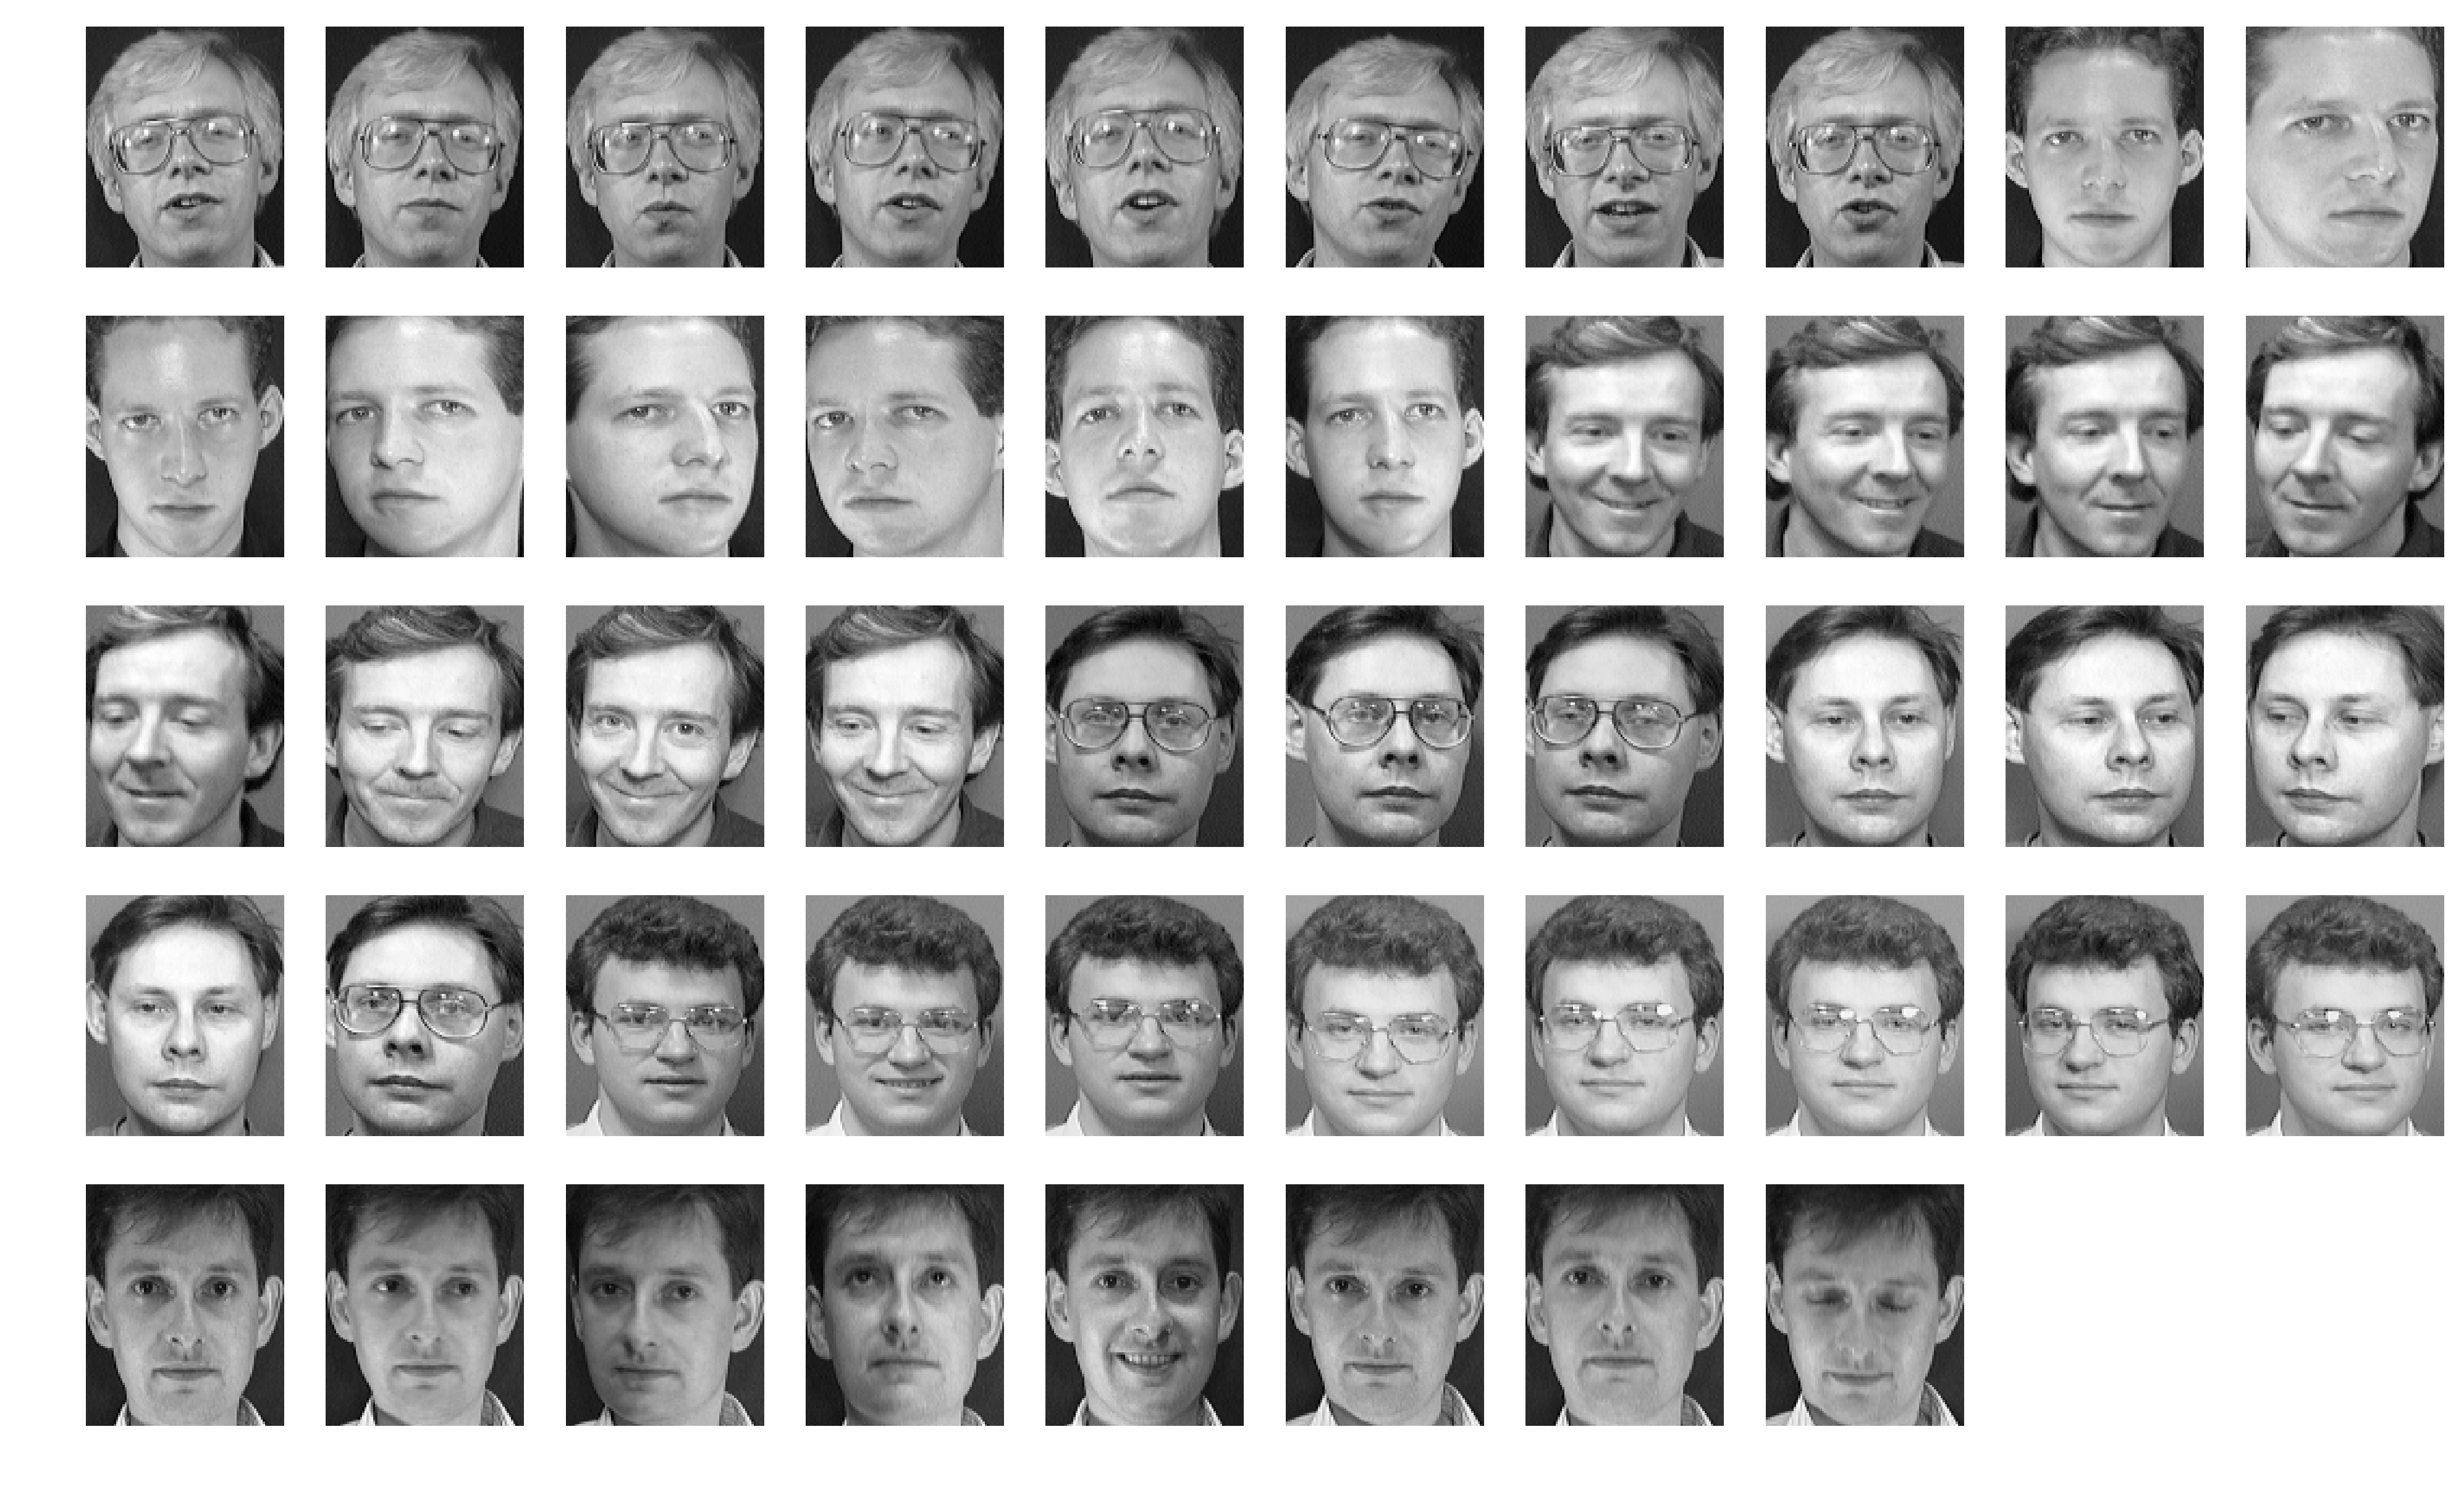

In [14]:
plt.show()

In [15]:
image_grid(X_test, H, W)

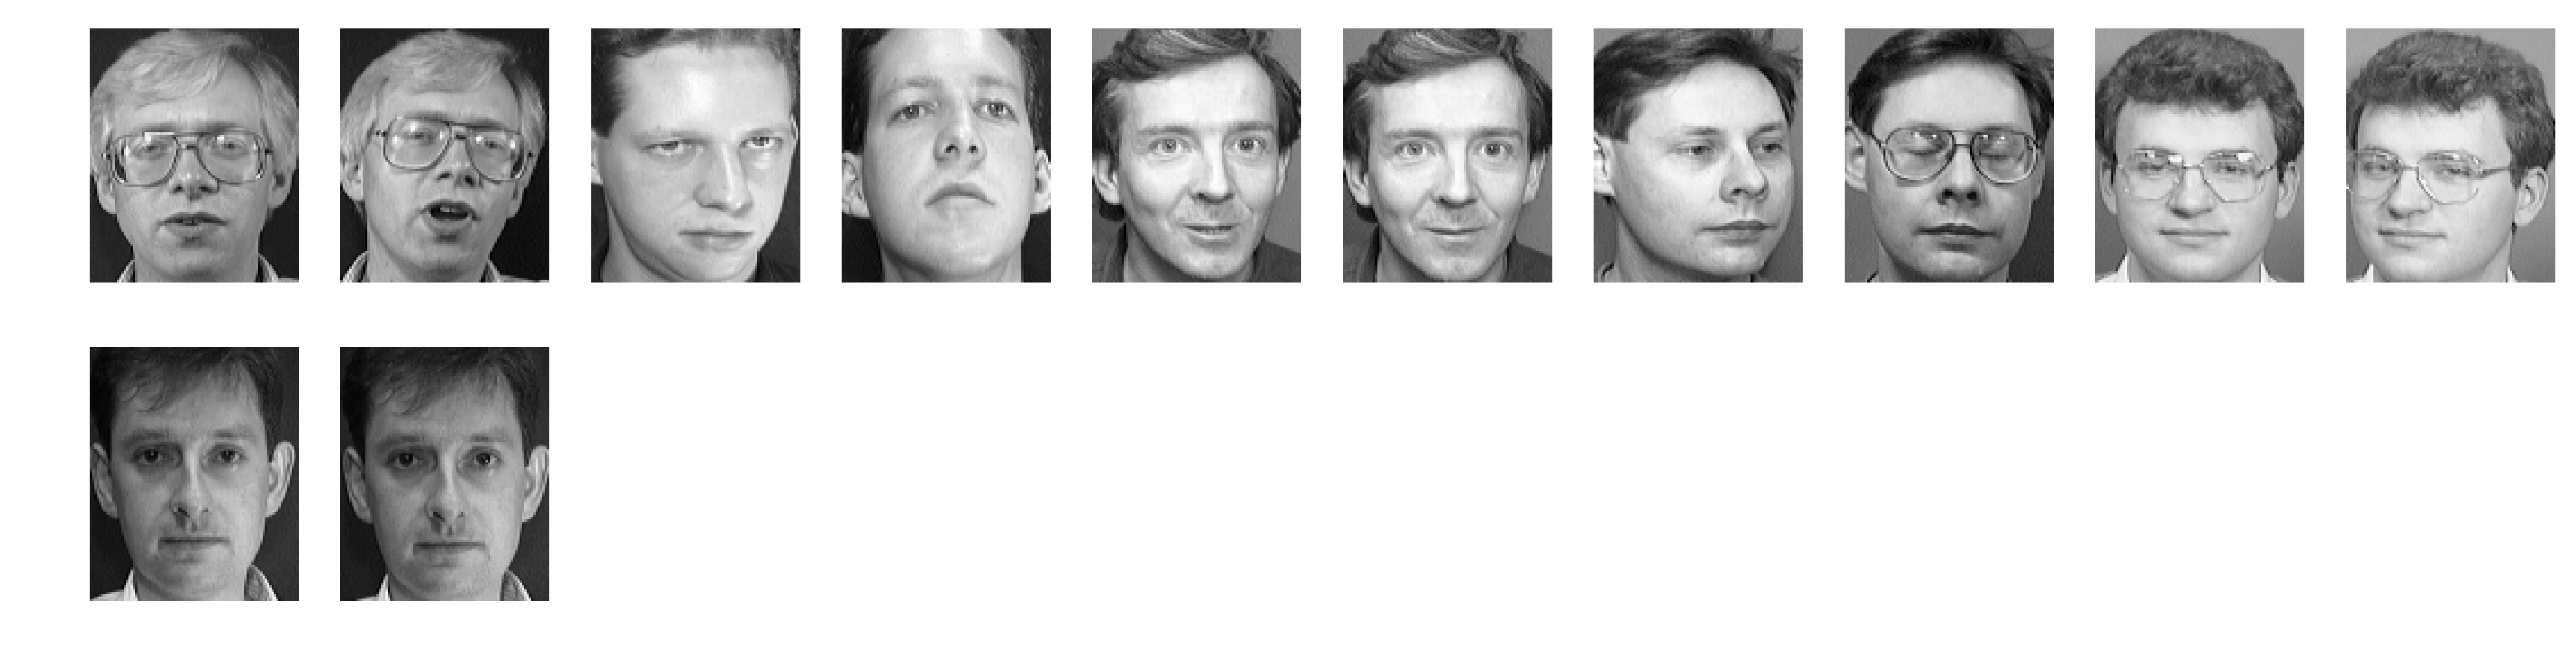

In [16]:
plt.show()

In [17]:
mean_image = np.mean(X_train, axis = 0)

In [18]:
mean_image

array([ 82.27083333,  83.20833333,  83.22916667, ...,  67.95833333,
        63.25      ,  63.54166667])

In [19]:
plt.show()

In [20]:
plt.imshow(np.reshape(mean_image,[H,W]),cmap = plt.get_cmap("gray"))

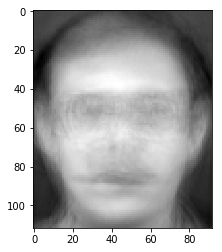

In [21]:
plt.show()

In [22]:
from sklearn.decomposition import PCA

In [23]:
n_components = 40

In [24]:
pca = PCA (n_components = n_components, svd_solver = 'randomized', whiten = True)

In [25]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

In [26]:
eigenfaces = pca.components_image_grid(eigenfaces[:,:], H, W)

AttributeError: 'PCA' object has no attribute 'components_image_grid'

In [27]:
eigenfaces = pca.components_

In [28]:
image_grid(eigenfaces[:,:], H, W)

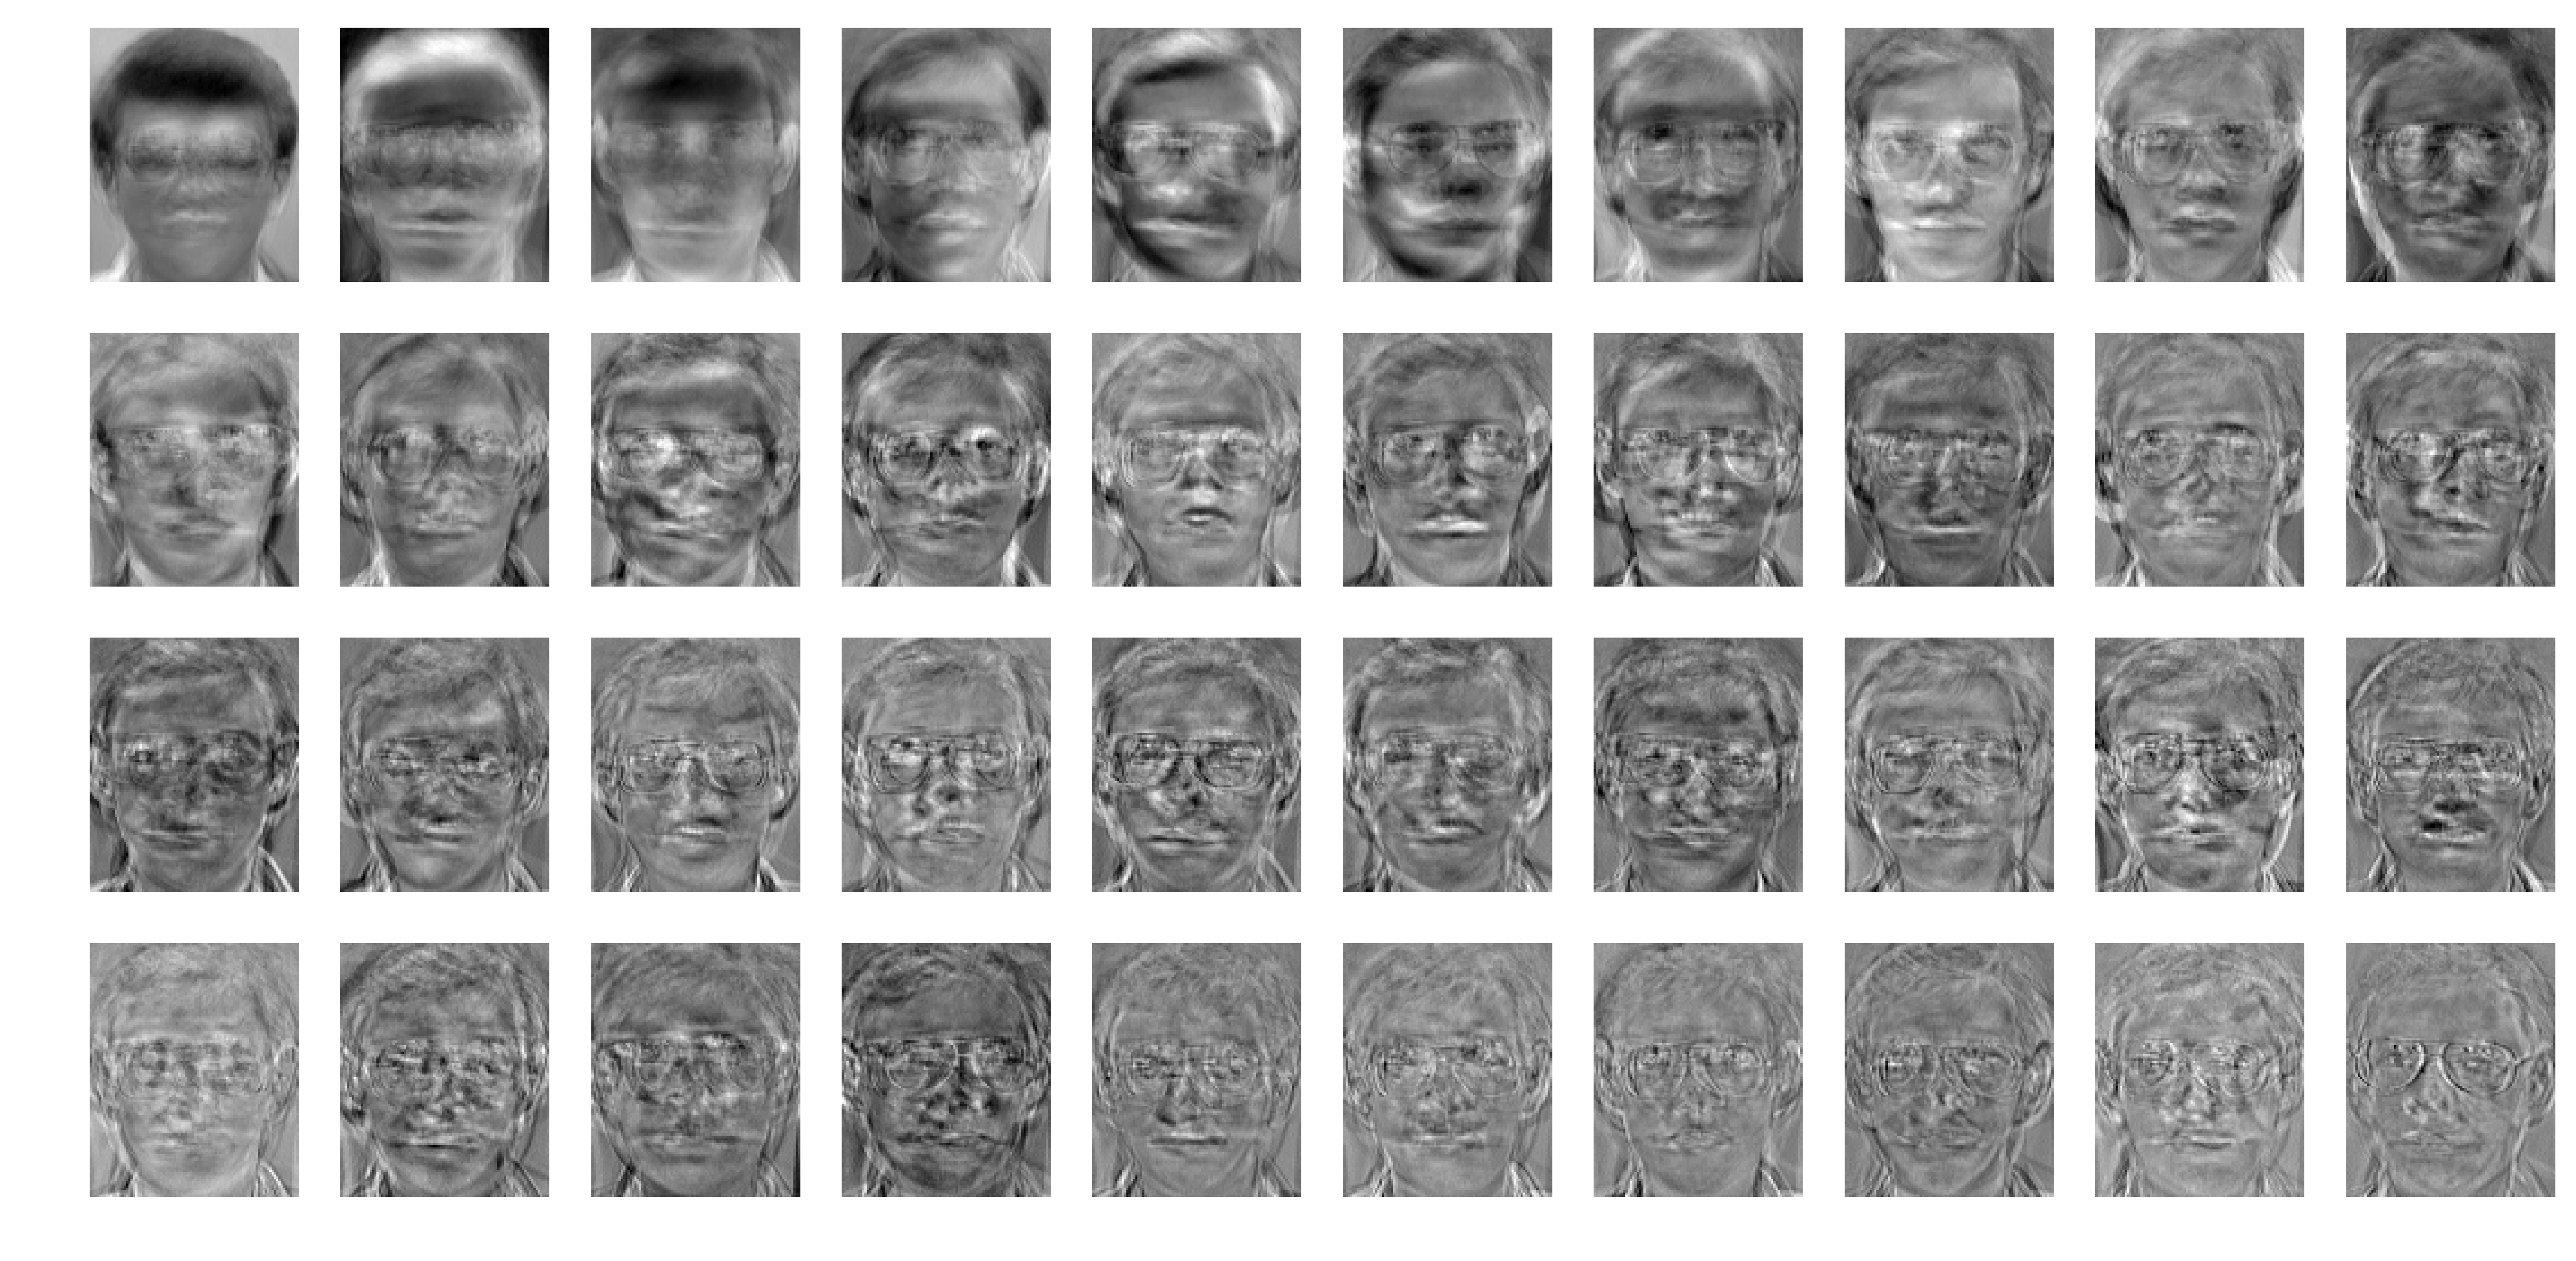

In [29]:
plt.show()

In [30]:
X_train_pca = pca.transform(X_train)

In [31]:
X_test_pca = pca.transform(X_test)

In [32]:
X_train_pca.shape

(48, 40)

In [33]:
X_test_pca.shape

(12, 40)

In [34]:
intra_class_dist = np.sum(np.power((X_train)pca[1,:] - X_test_pca[1,:]),2)

SyntaxError: invalid syntax (<ipython-input-34-ad282c4580bd>, line 1)

In [35]:
intra_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[1,:]),2))

In [36]:
intra_class_dist

22.795792788284729

In [37]:
inter_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[4,:]),2))

In [38]:
inter_class_dist

38.796611067553101

In [39]:
intra_class_dist2 = np.sum(np.power((X_train_pca[1,:] - X_test_pca[2,:]),2))

In [40]:
intra_class_dist2

40.938644951876327

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [42]:
plt.xlabel('number of components')

Text(0.5,0,'number of components')

In [43]:
plt.ylabel('cumulative explained variance')

Text(0,0.5,'cumulative explained variance')

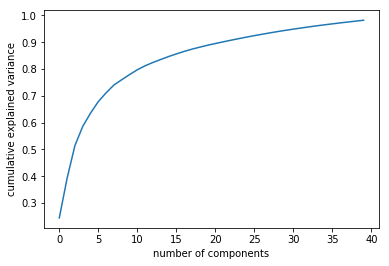

In [44]:
plt.show()